In [1]:
import pandas as pd
dt = pd.read_csv("C:/Users/Danvanth Sampath/Downloads/cancer_dt.csv")
dt

,id,age,gender,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,balanced_diet,...,fatigue,weight_loss,shortness_breath,wheezing,swal1ing_difficulty,clubbing_nails,frequent_cold,dry_cough,snoring,level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,3
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,3
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,3
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,3
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,3


In [2]:
Dat=dt.drop(['id','age','gender','balanced_diet','chest_pain','coughing_blood','fatigue','weight_loss','shortness_breath','wheezing','swal1ing_difficulty','clubbing_nails','frequent_cold','dry_cough','snoring'],axis=1)
Dat.head()

,air_pollution,alcohol_use,dust_allergy,occupational_hazards,genetic_risk,chronic_lung_disease,obesity,passive_smoking,smoking,level
0,2,4,5,4,3,2,4,3,2,1
1,3,1,5,3,4,2,2,2,4,2
2,4,5,6,5,5,4,7,2,3,3
3,7,7,7,7,6,7,7,7,7,3
4,6,8,7,7,7,6,7,8,7,3


In [3]:
import rfpimp
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(Dat, test_size=0.20)
df_train = df_train[Dat.columns]
df_test = df_test[Dat.columns]
X_train, y_train = df_train.drop('level',axis=1), df_train['level']
X_test, y_test = df_test.drop('level',axis=1), df_test['level']
rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)
imp = rfpimp.importances(rf, X_test, y_test)
imp

,Importance
Feature,
obesity,0.413212
alcohol_use,0.293892
smoking,0.155520
dust_allergy,0.093463
air_pollution,0.051525
chronic_lung_disease,0.012594
passive_smoking,0.010367
occupational_hazards,0.005802
genetic_risk,0.003925


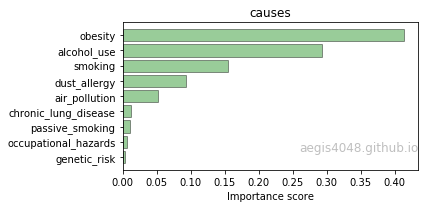

In [4]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(6, 3))

ax.barh(imp.index, imp['Importance'], height=0.8, facecolor='green', alpha=0.4, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('causes')
ax.text(0.8, 0.15, 'aegis4048.github.io', fontsize=12, ha='center', va='center',
        transform=ax.transAxes, color='grey', alpha=0.5)
plt.gca().invert_yaxis()

fig.tight_layout()

MLR

In [9]:
features = ['alcohol_use', 'dust_allergy', 'obesity', 'smoking']
target = 'level'

X = Dat[features].values.reshape(-1, len(features))
y = Dat[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [10]:
model.coef_

array([0.0569215 , 0.04354645, 0.19035003, 0.06972233])

In [11]:
model.intercept_

0.43495168689544905

In [12]:
model.score(X, y)


0.7565509524780506

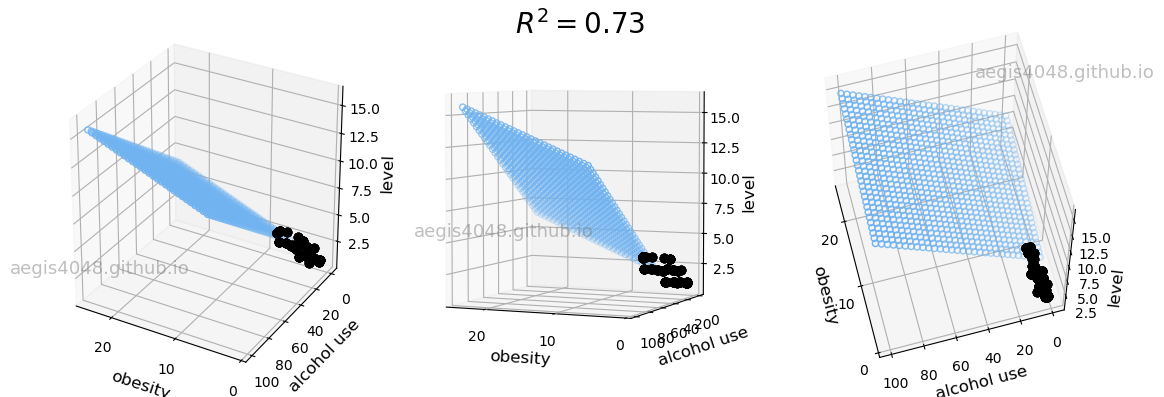

In [7]:
from mpl_toolkits.mplot3d import Axes3D
X = Dat[['obesity', 'alcohol_use']].values.reshape(-1,2)
Y = Dat['level']


x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)   # range of porosity values
y_pred = np.linspace(0, 100, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

#Train

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

# Evaluate 

r2 = model.score(X, Y)

# Plot 
plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('obesity', fontsize=12)
    ax.set_ylabel('alcohol use', fontsize=12)
    ax.set_zlabel('level', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=28, azim=120)
ax2.view_init(elev=4, azim=114)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()


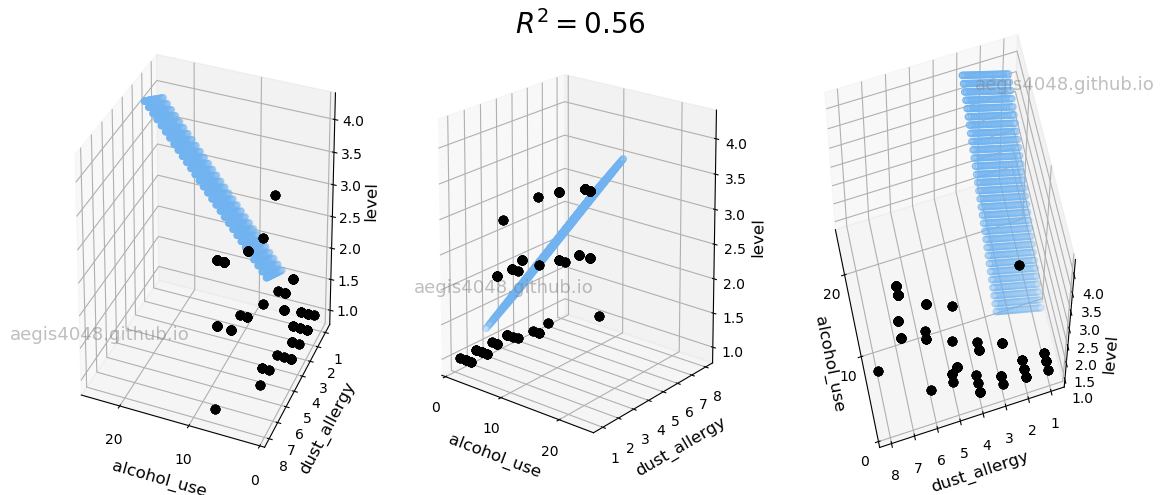

In [8]:
X = Dat[['alcohol_use', 'dust_allergy']].values.reshape(-1,2)
Y = Dat['level']


x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(6, 24, 30)      
y_pred = np.linspace(0.93, 2.9, 30) 
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Train 

ols = linear_model.LinearRegression()
model = ols.fit(X, Y)
predicted = model.predict(model_viz)

# Evaluate 

r2 = model.score(X, Y)

# Plot 

plt.style.use('default')

fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f0')
    ax.set_xlabel('alcohol_use', fontsize=12)
    ax.set_ylabel('dust_allergy', fontsize=12)
    ax.set_zlabel('level', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')

ax1.text2D(0.2, 0.32, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax1.transAxes, color='grey', alpha=0.5)
ax2.text2D(0.3, 0.42, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax2.transAxes, color='grey', alpha=0.5)
ax3.text2D(0.85, 0.85, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
           transform=ax3.transAxes, color='grey', alpha=0.5)

ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)

fig.suptitle('$R^2 = %.2f$' % r2, fontsize=20)

fig.tight_layout()

In [15]:
x_pred = np.array([3, 4, 2, 3])
x_pred = x_pred.reshape(-1, len(features))
model.predict(x_pred)

array([1.36976906])

In [22]:
features = ['alcohol_use', 'dust_allergy', 'obesity', 'smoking']
target = 'level'

X = Dat[features].values.reshape(-1, len(features))
y = Dat[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['alcohol_use', 'dust_allergy']
target = 'level'

X = Dat[features].values.reshape(-1, len(features))
y = Dat[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['alcohol_use',  'obesity']
target = 'level'

X = Dat[features].values.reshape(-1, len(features))
y = Dat[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['alcohol_use',  'smoking']
target = 'level'

X = Dat[features].values.reshape(-1, len(features))
y = Dat[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = [ 'dust_allergy', 'obesity']
target = 'level'

X = Dat[features].values.reshape(-1, len(features))
y = Dat[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = [ 'dust_allergy', 'smoking']
target = 'level'

X = Dat[features].values.reshape(-1, len(features))
y = Dat[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = [ 'obesity','smoking']
target = 'level'

X = Dat[features].values.reshape(-1, len(features))
y = Dat[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['alcohol_use', 'dust_allergy','obesity']
target = 'level'
X = Dat[features].values.reshape(-1, len(features))
y = Dat[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['alcohol_use', 'dust_allergy','smoking']
target = 'level'

X = Dat[features].values.reshape(-1, len(features))
y = Dat[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = [ 'dust_allergy','obesity','smoking']
target = 'level'
X = Dat[features].values.reshape(-1, len(features))
y = Dat[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)
print('')

########################################################################################

features = ['obesity','smoking','alcohol_use']
target = 'level'
X = Dat[features].values.reshape(-1, len(features))
y = Dat[target].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

print('Features                :  %s' % features)
print('Regression Coefficients : ', [round(item, 2) for item in model.coef_])
print('R-squared               :  %.2f' % model.score(X, y))
print('Y-intercept             :  %.2f' % model.intercept_)


Features                :  ['alcohol_use', 'dust_allergy', 'obesity', 'smoking']
Regression Coefficients :  [0.06, 0.04, 0.19, 0.07]
R-squared               :  0.76
Y-intercept             :  0.43

Features                :  ['alcohol_use', 'dust_allergy']
Regression Coefficients :  [0.13, 0.16]
R-squared               :  0.56
Y-intercept             :  0.67

Features                :  ['alcohol_use', 'obesity']
Regression Coefficients :  [0.09, 0.24]
R-squared               :  0.73
Y-intercept             :  0.56

Features                :  ['alcohol_use', 'smoking']
Regression Coefficients :  [0.14, 0.15]
R-squared               :  0.64
Y-intercept             :  0.77

Features                :  ['dust_allergy', 'obesity']
Regression Coefficients :  [0.11, 0.25]
R-squared               :  0.72
Y-intercept             :  0.40

Features                :  ['dust_allergy', 'smoking']
Regression Coefficients :  [0.19, 0.16]
R-squared               :  0.64
Y-intercept             :  0.42



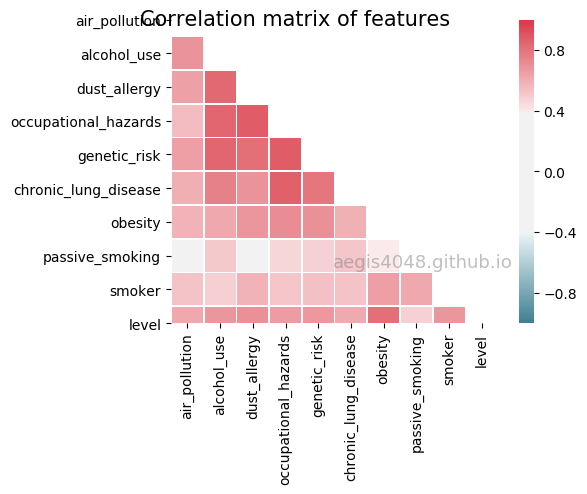

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt


corr = Dat.corr(method='spearman')

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
fig, ax = plt.subplots(figsize=(6, 5))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)
ax.text(0.77, 0.2, 'aegis4048.github.io', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)

fig.tight_layout()